In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split  #for splitting the dataset
from sklearn.linear_model import LinearRegression     #for Linear Regression
from sklearn.linear_model import Ridge,Lasso          
from sklearn.metrics import r2_score,mean_squared_error
import statistics 
import seaborn as sns

In [2]:
##Read the dataset:
sales_data= pd.read_csv('C:/Users/Srishti/Desktop/Data Science/Machine Learning/Assignments/Assignment1_PGD B7/Train.csv')
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#To check the number of null values present in all independent variables:Item_Weight and Outlet_Size are having the null values.
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
sales_data_modified=sales_data
sales_data_modified.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
sales_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
##Imputing the redundant values as one value:
sales_data_modified['Item_Fat_Content']=sales_data_modified['Item_Fat_Content'].str.lower().replace('lf','low fat').replace('reg','regular')
sales_data_modified['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [8]:
##Check for nan value:
sales_data_modified['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [9]:
##Imputing the null value by mean value wherever nan is present:
sales_data_modified['Item_Weight']=sales_data_modified['Item_Weight'].fillna(sales_data_modified['Item_Weight'].mean())

In [10]:
sales_data_modified['Item_Weight'].unique()

array([ 9.3       ,  5.92      , 17.5       , 19.2       ,  8.93      ,
       10.395     , 13.65      , 12.85764518, 16.2       , 11.8       ,
       18.5       , 15.1       , 17.6       , 16.35      ,  9.        ,
       13.35      , 18.85      , 14.6       , 13.85      , 13.        ,
        7.645     , 11.65      ,  5.925     , 19.25      , 18.6       ,
       18.7       , 17.85      , 10.        ,  8.85      ,  9.8       ,
       13.6       , 21.35      , 12.15      ,  6.42      , 19.6       ,
       15.85      ,  7.39      , 10.195     ,  9.895     , 10.895     ,
        7.905     ,  9.195     ,  8.365     ,  7.97      , 17.7       ,
       19.35      ,  8.645     , 15.6       , 18.25      ,  7.855     ,
        7.825     ,  8.39      , 12.85      , 19.        ,  5.905     ,
        7.76      , 16.75      , 15.5       ,  6.055     ,  6.305     ,
       20.85      , 20.75      ,  8.895     , 19.7       ,  8.75      ,
       13.3       ,  8.31      , 19.75      , 17.1       , 10.5 

In [11]:
##Check for the nan values present:
sales_data_modified['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
##Imputing the nan values by most occuring value:
sales_data_modified['Outlet_Size']=sales_data_modified['Outlet_Size'].fillna(statistics.mode(sales_data_modified['Outlet_Size']))

In [13]:
sales_data_modified['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [14]:
sales_data_modified.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
#checking the values if any null values exist or not after imputation
sales_data_modified.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

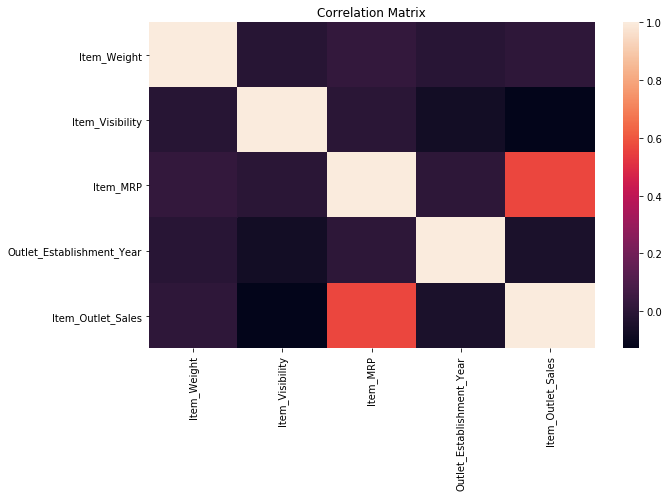

In [16]:
##To check the correlation of the independent variables with the dependent variable:
plt.figure(figsize=(10,6))
sns.heatmap(sales_data_modified.corr())
plt.title('Correlation Matrix')
plt.show()

Here we can see that the Item_Outlet_Sales(dependent variable) is highly correlated with Item_Weight, Item_Visibility and Outlet_Establishment_Year but moderately associated with Item_MRP.

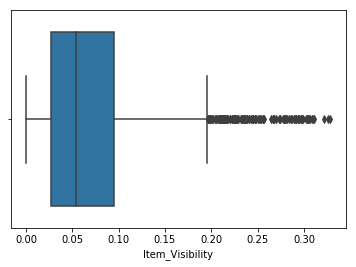

In [17]:
##To check for the outliers present:
sns.boxplot(sales_data_modified['Item_Visibility'])

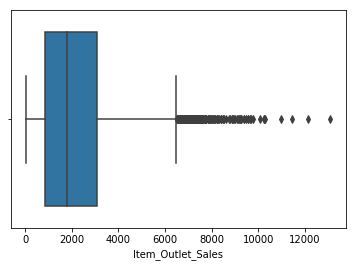

In [18]:
##To check for the outliers in target variable but ideally we shouldn't treat the target and let it stay as it is:
sns.boxplot(sales_data_modified['Item_Outlet_Sales'])

In [19]:
sales_data_modified.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
##Finding the 0 elements maximum occuring in Item_Visibility:
sales_data_modified[sales_data_modified['Item_Visibility']==0]['Item_Visibility'].head()

3     0.0
4     0.0
5     0.0
10    0.0
32    0.0
Name: Item_Visibility, dtype: float64

In [21]:
##Imputing the zero values by mean of the Item_Visibility column:
sales_data_modified['Item_Visibility']=sales_data_modified['Item_Visibility'].replace(sales_data_modified[sales_data_modified['Item_Visibility']==0]['Item_Visibility'],sales_data_modified['Item_Visibility'].mean())

In [22]:
##Creating new columns using get_dummies and using label_encoding we are getting the numbers as per the respective value:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cols=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier']
cols1=['Outlet_Identifier']
for i in cols:
    sales_data_modified[i]=le.fit_transform(sales_data_modified[i])
sales_data_modified=pd.get_dummies(sales_data_modified,columns=cols1)


In [23]:
sales_data_modified.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,9.30,0,0.016047,4,249.8092,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,14,48.2692,2009,1,2,2,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,10,141.6180,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.066132,6,182.0950,1998,1,2,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.066132,9,53.8614,1987,0,2,1,...,0,1,0,0,0,0,0,0,0,0


In [24]:
sales_data_modified.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Identifier_0', 'Outlet_Identifier_1', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Identifier_9'],
      dtype='object')

In [25]:
#fitting the data into dependent and independent variables:
X= sales_data_modified.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
Y=sales_data_modified['Item_Outlet_Sales']

In [26]:
X.shape

(8523, 18)

In [27]:
Y.shape

(8523,)

In [28]:
#splitting dataset:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

In [29]:
#Model Initialization:
reg=LinearRegression()

#Data Fitting:
reg=reg.fit(x_train,y_train)

In [30]:
print('Coefficient of a1:',reg.coef_)

Coefficient of a1: [-8.04679456e-03  5.67284012e+01 -3.51200915e+02  1.08604164e+00
  1.53810213e+01 -2.19468152e+02 -2.55461871e+02  8.97559421e+02
 -4.99045775e+02  3.10767070e+02  3.46860271e+02 -6.77143655e+02
 -7.57951518e+02  1.58852892e+02  6.30055641e+02  1.80761152e+02
  2.19194794e+02  8.76491272e+01]


In [31]:
print('Coefficient of a0:',reg.intercept_)

Coefficient of a0: -588.1831560044193


In [32]:
#Model Evaluation:
Y_pred=reg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,Y_pred))
r2=r2_score(y_test,Y_pred) #built in function score() indicates R-squared value
print('RMSE =',rmse)
print('R2 Score =',r2)

RMSE = 1083.604235250952
R2 Score = 0.6064100830864751


In this case, R-square is 60.64%.This means 60.64% is not the main accuracy. This is calculated here for our prediction according to the data present.

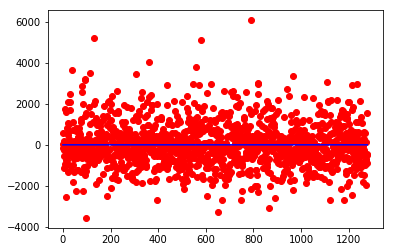

In [33]:
#plot the residual:
x_plot=[i for i in range(0,len(Y_pred))]
plt.scatter(x_plot,y_test-Y_pred,color='red')
plt.plot(x_plot,[0]*len(Y_pred),color='blue')
plt.show()

## Regularization:

In [34]:
predictors=x_train.columns
predictors

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Identifier_0', 'Outlet_Identifier_1', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Identifier_9'],
      dtype='object')

In [35]:
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

Outlet_Identifier_4    -757.951518
Outlet_Identifier_3    -677.143655
Outlet_Identifier_0    -499.045775
Item_Visibility        -351.200915
Outlet_Location_Type   -255.461871
Outlet_Size            -219.468152
Item_Weight              -0.008047
Item_Type                 1.086042
Item_MRP                 15.381021
Item_Fat_Content         56.728401
Outlet_Identifier_9      87.649127
Outlet_Identifier_5     158.852892
Outlet_Identifier_7     180.761152
Outlet_Identifier_8     219.194794
Outlet_Identifier_1     310.767070
Outlet_Identifier_2     346.860271
Outlet_Identifier_6     630.055641
Outlet_Type             897.559421
dtype: float64

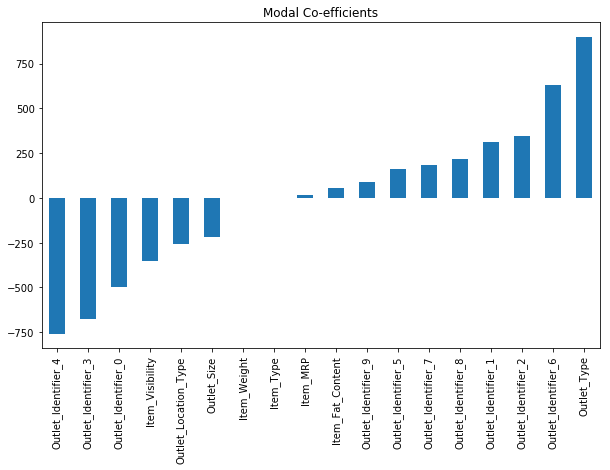

In [36]:
plt.figure(figsize=(10,6))
coef.plot(title='Modal Co-efficients',kind='bar')

## Lasso & Ridge Regression:

In [37]:
##Ridge:
#for checking all the values of alpha so as to see which value of alpha is giving better accuracy of the model by seeing R2

alpha_val=[0.01,0.05,0.5,5]
for i in alpha_val:
    ridgeRegression=Ridge(alpha=i,normalize=True)
    ridgeRegression.fit(x_train,y_train)
    pred1=ridgeRegression.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred1))
    r2=r2_score(y_test,pred1)

    print('RMSE of alpha as',[i],'=',rmse,'R2=',r2)

RMSE of alpha as [0.01] = 1084.3933088568415 R2= 0.6058366551080249
RMSE of alpha as [0.05] = 1088.3948975413914 R2= 0.6029222332323039
RMSE of alpha as [0.5] = 1169.5870405785956 R2= 0.5414700885093862
RMSE of alpha as [5] = 1527.595849002102 R2= 0.21779693099092257


The best fit alpha value is 0.01 which is providing 60.58% accuracy as per our prediction. 

In [38]:
#after the above code is executed, we can decide which alpha value should be computed for the Ridge regression values 
#against the linear regression values

ridgeRegression=Ridge(alpha=0.01,normalize=True)
ridgeRegression.fit(x_train,y_train)
pred1=ridgeRegression.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred1))
r2=r2_score(y_test,pred1)

print('RMSE=',rmse,'R2=',r2)

RMSE= 1084.3933088568415 R2= 0.6058366551080249


In [39]:
df=pd.DataFrame(columns=['Linear Reg','Ridge Reg'])
for i in range(len(ridgeRegression.coef_)):
    df=df.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeRegression.coef_[i]},ignore_index=True)
df

,Linear Reg,Ridge Reg
0,-0.008047,0.045837
1,56.728401,56.684731
2,-351.200915,-377.418261
3,1.086042,1.140471
4,15.381021,15.228705
5,-219.468152,-73.402794
6,-255.461871,-15.125169
7,897.559421,404.817802
8,-499.045775,-1314.090307
9,310.767070,119.986557


Here we can see how the values have been adjusted after using Ridge regression on the dataset, where some values have been incremented as well as decremented so as to balance them out.

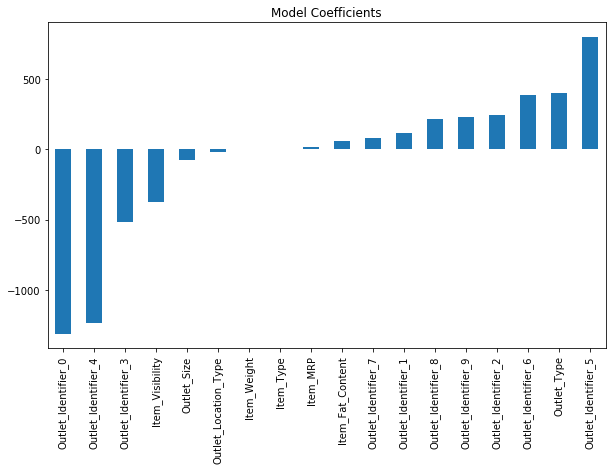

In [40]:
predictors=x_train.columns
coef=pd.Series(ridgeRegression.coef_,predictors).sort_values()
plt.figure(figsize=(10,6))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

The changes could be seen as when compared to the regularized graph, previously created.

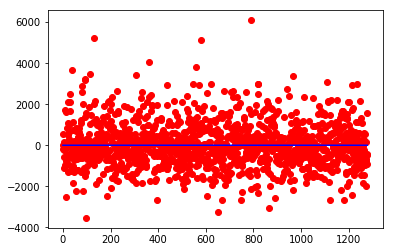

In [41]:
#plot the residual:
x_plot=[i for i in range(0,len(pred1))]
plt.scatter(x_plot,y_test-pred1,color='red')
plt.plot(x_plot,[0]*len(pred1),color='blue')
plt.show()

In [42]:
#Lasso:
#for checking all the values of alpha so as to see which value of alpha is giving better accuracy of the model by seeing R2

alpha_val=[0.01,0.05,0.5,5]
for i in alpha_val:
    lassoRegression=Lasso(alpha=i,normalize=True)
    lassoRegression.fit(x_train,y_train)
    pred2=lassoRegression.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred2))
    r2=r2_score(y_test,pred2)

    print('RMSE of alpha as',[i],'=',rmse,'R2=',r2)

RMSE of alpha as [0.01] = 1083.6114240821107 R2= 0.6064048607723644
RMSE of alpha as [0.05] = 1083.714095469893 R2= 0.6063302715372842
RMSE of alpha as [0.5] = 1091.2314909880438 R2= 0.6008497943637319
RMSE of alpha as [5] = 1363.8556025064183 R2= 0.3764958326407134


The best fit alpha value is 0.01 which is providing 60.64% accuracy as per our prediction. 

In [43]:
#best value of alpha to be computed for calculating the Lasso Regression against the linear regression values
lassoReg=Lasso(alpha=0.01,normalize=True)
lassoReg.fit(x_train,y_train)
pred2=lassoReg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred2))
r2=r2_score(y_test,pred2)

print('RMSE=',rmse,'R2=',r2)

RMSE= 1083.6114240821107 R2= 0.6064048607723644


In [44]:
df1=pd.DataFrame(columns=['Linear Reg','Ridge Reg','Lasso Reg'])
for i in range(len(lassoReg.coef_)):
    df1=df1.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeRegression.coef_[i],'Lasso Reg':lassoReg.coef_[i]},
                   ignore_index=True)
df1

,Linear Reg,Ridge Reg,Lasso Reg
0,-0.008047,0.045837,0.000000
1,56.728401,56.684731,54.708406
2,-351.200915,-377.418261,-340.039703
3,1.086042,1.140471,0.865732
4,15.381021,15.228705,15.367778
5,-219.468152,-73.402794,-0.000000
6,-255.461871,-15.125169,0.000000
7,897.559421,404.817802,711.600716
8,-499.045775,-1314.090307,-1210.591167
9,310.767070,119.986557,0.000000


Here we can see how the values have been adjusted after using Lasso regression on the dataset, where some values have been decremented to such extent that the value tends towards 0 or become 0,so as to nullify the non-impacting columns.

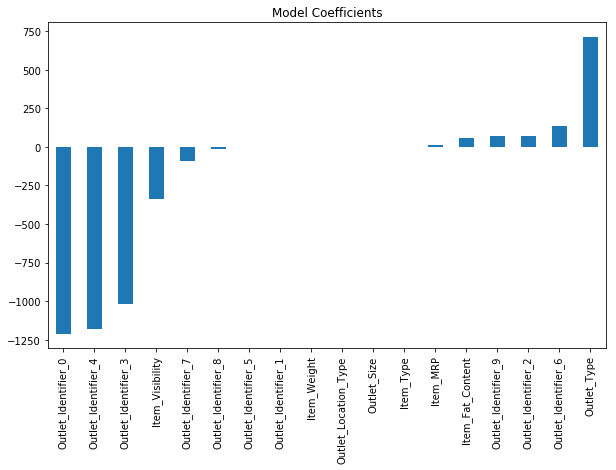

In [45]:
predictors=x_train.columns
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,6))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

The changes could be seen as when compared to the regularized graph, previously created.

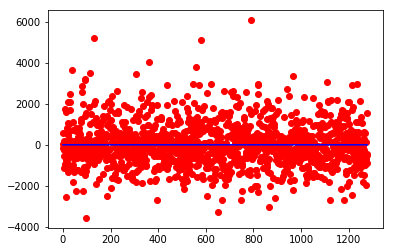

In [46]:
#plot the residual:
x_plot=[i for i in range(0,len(pred2))]
plt.scatter(x_plot,y_test-pred2,color='red')
plt.plot(x_plot,[0]*len(pred2),color='blue')
plt.show()

In [47]:
#Test File:
test_file=pd.read_csv('C:/Users/Srishti/Desktop/Data Science/Machine Learning/Assignments/Assignment1_PGD B7/Test.csv')
test_file.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [48]:
#To check the number of null values present in all independent variables:Item_Weight and Outlet_Size are having the null values.
test_file.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [49]:
test_file.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [50]:
test_file['Item_Fat_Content']=test_file['Item_Fat_Content'].str.lower().replace('lf','low fat').replace('reg','regular')
test_file['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [51]:
test_file['Item_Weight']=test_file['Item_Weight'].fillna(test_file['Item_Weight'].mean())

In [52]:
test_file['Outlet_Size']=test_file['Outlet_Size'].fillna(statistics.mode(test_file['Outlet_Size']))

In [53]:
#checking the values if any null values exist or not after imputation
test_file.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [54]:
test_file['Item_Visibility']=test_file['Item_Visibility'].replace(test_file[test_file['Item_Visibility']==0]['Item_Visibility'],test_file['Item_Visibility'].mean())

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cols=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier']
cols1=['Outlet_Identifier']
for i in cols:
    test_file[i]=le.fit_transform(test_file[i])
test_file=pd.get_dummies(test_file,columns=cols1)


In [56]:
#fitting the data into dependent and independent variables:
X=sales_data_modified.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
Y=sales_data_modified['Item_Outlet_Sales']

In [57]:
#splitting dataset:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

In [58]:
#Model Initialization:
reg=LinearRegression()

#Data Fitting:
reg=reg.fit(x_train,y_train)

In [59]:
test_file.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
test_file.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,20.750000,0,0.007565,13,107.8622,1,0,1,0,0,0,0,0,0,0,0,0,1
1,8.300000,1,0.038428,4,87.3198,1,1,1,0,0,1,0,0,0,0,0,0,0
2,14.600000,0,0.099575,11,241.7538,1,2,0,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,13,155.0340,1,1,1,0,0,1,0,0,0,0,0,0,0
4,12.695633,1,0.118599,4,234.2300,1,2,3,0,0,0,0,0,1,0,0,0,0


In [60]:
#Model Evaluation:
Y_pred1=reg.predict(test_file)
Y_pred1

array([1847.8828279 , 1571.88415963, 1877.65769528, ..., 1824.39595334,
       3519.20416626, 1265.68363763])

In this whole dataset while training the model, I have removed Item_Identifier and Outlet_Establishment_Year columns while preparing the model because these were of less importance in relevance to Item_Outlet_Sales column, whereas i kept the other columns like Item_MRP as it helps the consumers to look for better affordable stuffs, Outlet_Size is important as it helps in understanding if a store is big enough in size it will accomodate more goods as compared to a small store, Outlet_Location_Type will help in identifying if the store is present in Tier 1 city or others and so it goes on.
